In [13]:
from Detector.detector import Detector
from PIL import Image
import torch
from torchvision import transforms
import Detector.visualize as visualize  # TODO check imports
import re
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import random

In [19]:
detector = Detector()

In [23]:
def plot_image(detections, img, detector):
    classes = detector.classes
    img_size = detector.img_size
    cmap = plt.get_cmap('tab20b')
    colors = [cmap(i) for i in np.linspace(0, 1, 20)]
    img = np.array(img)
    plt.figure()
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(img)
    pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
    pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
    unpad_h = img_size - pad_y
    unpad_w = img_size - pad_x
    if detections is not None:
        unique_labels = detections[:, -1].cpu().unique()
        n_cls_preds = len(unique_labels)
        bbox_colors = random.sample(colors, n_cls_preds)
        # browse detections and draw bounding boxes
        for x1, y1, x2, y2, conf, cls_conf, cls_pred in detections:
            box_h = ((y2 - y1) / unpad_h) * img.shape[0]
            box_w = ((x2 - x1) / unpad_w) * img.shape[1]
            y1 = ((y1 - pad_y // 2) / unpad_h) * img.shape[0]
            x1 = ((x1 - pad_x // 2) / unpad_w) * img.shape[1]
            color = bbox_colors[int(np.where(
                 unique_labels == int(cls_pred))[0])]
            bbox = patches.Rectangle((x1, y1), box_w, box_h,
                 linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(bbox)
            plt.text(x1, y1, s=classes[int(cls_pred)], 
                    color='white', verticalalignment='top',
                    bbox={'color': color, 'pad': 0})
    plt.axis('off')
    # save image
    # plt.savefig(img_path.replace(".jpg", "-det.jpg"),        
    #                   bbox_inches='tight', pad_inches=0.0)
    plt.show()

None


<Figure size 432x288 with 0 Axes>

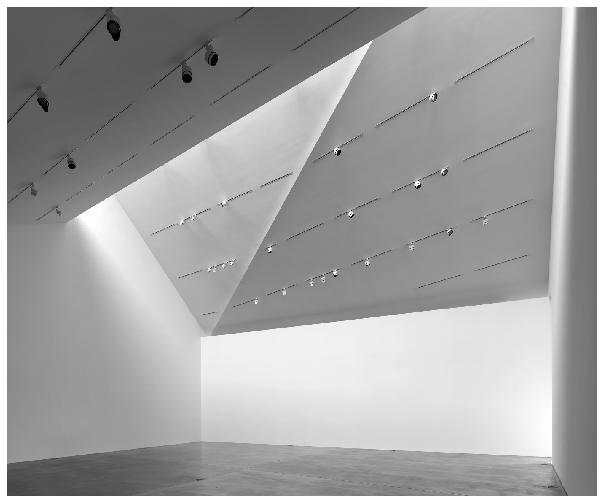

In [57]:
image = Image.open("data/falsepositives/6.jpg").convert("RGB")
detections = detector.detect_image(visualize.compose_torch_transform(image.size[0], image.size[1], detector)(image))
print(detections)
plot_image(detections, image, detector)